In [1]:
import pandas as pd
from Bio import SeqIO

# Выделение имен генов из фаста файлов

## Corecrunch

In [5]:
from Bio import SeqIO
import pandas as pd

In [26]:
#Вектор имен
pgap_3918_names = []
pgap_3817_names = []

for seq1 in SeqIO.parse(open('/home/aster/Project_Geoarchaeota_28.11/results/novel_core/data/3918-20_PGAP_out_CDS.faa'), 'fasta'):
    pgap_3918_names.append((seq1.name, seq1.seq))

for seq in SeqIO.parse(open('/home/aster/Project_Geoarchaeota_28.11/results/novel_core/data/3817-70_PGAP_out_CDS.faa'), 'fasta'):
    pgap_3817_names.append((seq.name, seq.seq))

pgap_3817_names = [i[0][:11] for i in pgap_3817_names]
pgap_3918_names = [i[0][:11] for i in pgap_3918_names]

In [28]:
#Чтение кора
core_data = pd.read_csv('/home/aster/Project_Geoarchaeota_28.11/results/novel_core/core__out/families_core.txt', delimiter='\t', header=None)

In [29]:
for idx, row in core_data.iterrows():
    core_data.loc[idx, 1] = row[1].split('&')[1][:11]
    core_data.loc[idx, 2] = row[2].split('&')[1][:11]
crunc_core_fam = pd.DataFrame({'Geo_3817' :core_data[1], 'Geo_3918':core_data[2]})

In [22]:
crunc_core_fam

,Geo_3817,Geo_3918
0,PRZ02_00015,PQ610_02945
1,PRZ02_00020,PQ610_02940
2,PRZ02_00025,PQ610_02935
3,PRZ02_00030,PQ610_02930
4,PRZ02_00035,PQ610_02925
...,...,...
976,PRZ02_07250,PQ610_07120
977,PRZ02_07280,PQ610_06905
978,PRZ02_07285,PQ610_06940
979,PRZ02_07290,PQ610_06955


In [30]:
crunc_3918_cor_names = crunc_core_fam['Geo_3918'].to_list()

crunc_3817_cor_names = crunc_core_fam['Geo_3817'].to_list()

uniq_3817 = []
uniq_genes = []
for i in pgap_3817_names:
    if i not in crunc_3817_cor_names:
        uniq_3817.append(i)

uniq_3918 = []
for i in pgap_3918_names:
    if i not in crunc_3918_cor_names:
        uniq_3918.append(i)

In [31]:
uniq_3817

['PRZ02_00010_PRZ02_00010_hypothetical',
 'PRZ02_00015_PRZ02_00015_chloride',
 'PRZ02_00020_PRZ02_00020_deoxyhypusine',
 'PRZ02_00025_PRZ02_00025_hypothetical',
 'PRZ02_00030_PRZ02_00030_divalent',
 'PRZ02_00035_PRZ02_00035_4Fe-4S',
 'PRZ02_00040_PRZ02_00040_thiamine-phosphate',
 'PRZ02_00050_PRZ02_00050_C/D',
 'PRZ02_00055_PRZ02_00055_fibrillarin-like',
 'PRZ02_00060_rnhB_ribonuclease',
 'PRZ02_00065_PRZ02_00065_hypothetical',
 'PRZ02_00070_PRZ02_00070_RlmE',
 'PRZ02_00075_PRZ02_00075_Gar1/Naf1',
 'PRZ02_00080_PRZ02_00080_signal',
 'PRZ02_00085_PRZ02_00085_30S',
 'PRZ02_00095_PRZ02_00095_zinc-binding',
 'PRZ02_00100_PRZ02_00100_hypothetical',
 'PRZ02_00105_PRZ02_00105_cytidine',
 'PRZ02_00110_udp_uridine',
 'PRZ02_00115_PRZ02_00115_NMD3-related',
 'PRZ02_00120_metG_methionine--tRNA',
 'PRZ02_00125_PRZ02_00125_PHP',
 'PRZ02_00130_PRZ02_00130_tRNA',
 'PRZ02_00135_PRZ02_00135_purine-nucleoside',
 'PRZ02_00140_PRZ02_00140_radical',
 'PRZ02_00145_PRZ02_00145_MFS',
 'PRZ02_00150_PRZ02_00150

In [7]:
print(len(crunc_core_fam), len(uniq_3918), len(uniq_3817))

981 404 430


In [1]:
from matplotlib_venn import venn3, venn2_circles, venn2
import matplotlib.pyplot as plt

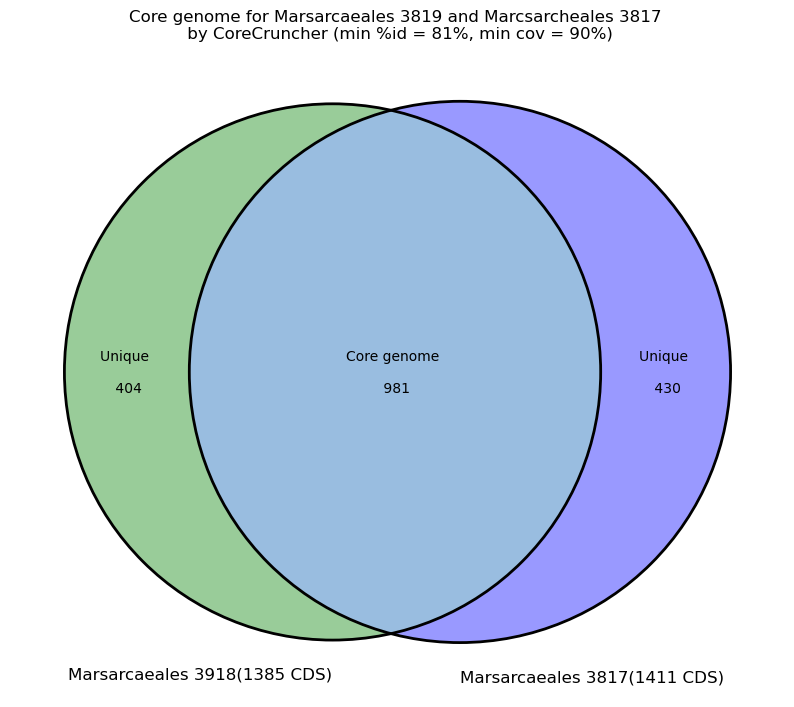

In [3]:
plt.figure(figsize=(10,10))

v = venn2(subsets={'10': 404, '01': 430, '11': 981}, set_labels = ('Marsarcaeales 3918(1385 CDS)', 'Marsarcaeales 3817(1411 CDS)'),
          set_colors=('green', 'blue'))
v.get_label_by_id('10').set_text('Unique \n\n 404')
v.get_label_by_id('01').set_text('Unique \n\n 430')
v.get_label_by_id('11').set_text('Core genome \n\n 981')


c = venn2_circles(subsets=(404,430,981))

plt.title('Core genome for Marsarcaeales 3819 and Marcsarcheales 3817 \n by CoreCruncher (min %id = 81%, min cov = 90%)')
plt.savefig('/home/aster/Thesises/fig/core.svg', format='svg', dpi = 300)
plt.show()